In [1]:
# from __future__ import print_function, division

In [2]:
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import math as math

# Part 1

In [3]:
def integrate(y, dx):
    """
    Takes an array of y-values and a step size dx of the corresponding x values 
    and numerically integrates the function, returning the final value
    """
    counter = 0
    for yi in y:
        counter += dx * yi
    return counter

In [4]:
def plot_fn(xarr, yarr, title=''):
    """
    Basic plotting function
    """
    plt.plot(xarr, yarr)
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

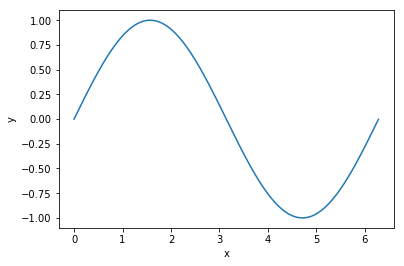

In [5]:
x = np.arange(0, 2 * np.pi, 0.01)
y = np.array([])
for i in x:    
    y = np.append(y, math.sin(i))
plot_fn(x, y)


In [6]:
integrate(y, 0.01)


-1.0853464615831085e-05

In [7]:
np.trapz(y, [0, 2*np.pi])

0.003187487771810993

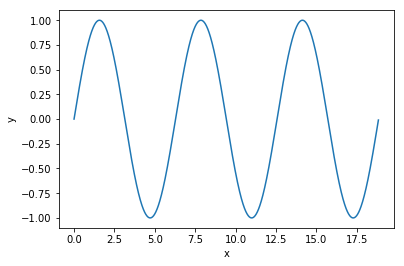

y = 0.9999996829318346 at x = 1.57
y = -0.999997146387718 at x = 4.71
y = 0.9999920733059188 at x = 7.8500000000000005
y = -0.9999902065507035 at x = 11.0
y = 0.999995986891472 at x = 14.14
y = -0.999999230697499 at x = 17.28


In [8]:
x = np.arange(0, 6 * np.pi, 0.01)
y = np.array([])
for i in x:    
    y = np.append(y, math.sin(i))

plot_fn(x, y)

diff = np.diff(y)
slope = np.sign(diff)

minmaxlocs = np.where(slope[1:] - slope[:-1])[0] + 1
for i in minmaxlocs:
    print("y =",y[i],"at x =",x[i])

# Part 2

In [9]:
def wavepacket(x, k, sigma):
    """
    This function creates a wavepacket on the interval defined by x with
    wavevector k and standard deviation sigma.
    """
    return np.sin(k*x) *  np.exp(-(x**2)/(2*sigma**2))

In [10]:
def noisy_packet(x_values, k, sigma, noise_amplitude):
    """
    This function returns a noisy Gaussian wavepacket with wave
    vector k, standard deviation sigma and Gaussian noise of standard
    deviation noise_amplitude.
    """
    clean_y = wavepacket(x_values,k,sigma)
    noisy_y = clean_y + noise_amplitude*np.random.randn(len(x_values))
    return noisy_y

In [28]:
def clean_data(x_values,y_values):
    """
    This function should take a set of y_values, perform the Fourier
    transform on it, filter out the high frequency noise, transform the
    signal back into real space, and return it.
    """
    
    y_fft = np.fft.rfft(y_values)
    
    low_pass_filter = np.ones(y_fft.shape) # build low pass filter for Fourier function
    num_freq = y_fft.size
    low_pass_filter[int(num_freq/25):num_freq] = 0
    
    y_clean_values = np.fft.irfft(low_pass_filter)
    
    return y_clean_values

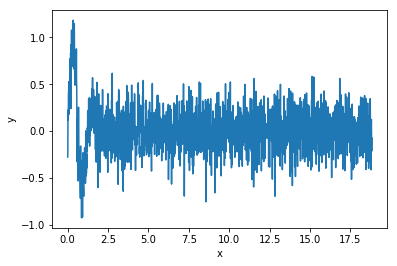

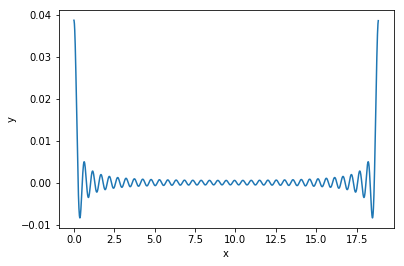

In [38]:
wave = noisy_packet(x, 5, 1, 0.2)
plot_fn(x, wave)
newY = clean_data(x, wave)
plot_fn(x[1:1885], newY)

# Part 3

In [15]:
# TODO mask the arrays, then plot

In [16]:
# TODO try to generate masked noisy data and then clean it